# 노원구

In [1]:
import pandas as pd
import numpy as np
import os,glob
import warnings
warnings.filterwarnings('ignore')

file_list = os.listdir('./환경기상데이터/노원구')
len(file_list)

22

In [2]:
nowon = pd.DataFrame()
for file in file_list :
    path = './환경기상데이터/노원구/'
    f1 = pd.read_csv(path + file)
    f1.drop(['Unnamed: 10'],axis=1,inplace=True)
    nowon = pd.concat([nowon, f1])

In [15]:
print('dataset shape :',nowon.shape)
nowon.head(2)

dataset shape : (8580960, 11)


,tm,serial,flag,pm10,co2,vocs,noise,temp,humi,pm25,GU_CD
0,201804090000,V10O1610351,-999,-999,-999,-999,-999,-999.0,-999,NaN,350
1,201804090001,V10O1610351,-999,-999,-999,-999,-999,-999.0,-999,NaN,350


In [38]:
nowon = nowon.replace(-999,np.nan)
nowon = nowon.replace(-9999,np.nan)
nowon.isna().sum()

tm              0
serial          0
flag       151925
pm10       170529
co2       8580960
vocs      8580960
noise      155634
temp       155634
humi       155634
pm25       170529
GU_CD           0
dtype: int64

In [29]:
nowon.flag.value_counts()

1.0    8429035
Name: flag, dtype: int64

In [52]:
nowon.drop(['flag','co2','vocs'],axis=1,inplace=True)

# 동별로 median으로 대체

In [3]:
dong_df = pd.read_csv('dong_code.csv',encoding='utf-8')
dong_df.head(2)

,serial,dong,DONG_CD,GU_CD
0,V10O1610629,공릉1동,595,350
1,V10O1610630,공릉1동,595,350


In [ ]:
nowon = pd.merge(nowon,dong_df.drop(['dong','GU_CD'],axis=1),on='serial')

In [69]:
def make_date(tm):
    return(str(tm)[0:10])
nowon['HOUR_DT'] = nowon['tm'].apply(lambda x: make_date(x))

In [73]:
nowon.columns

Index(['tm', 'serial', 'pm10', 'noise', 'temp', 'humi', 'pm25', 'GU_CD',
       'DONG_CD', 'HOUR_DT'],
      dtype='object')

In [72]:
pm25_df = nowon.groupby(['DONG_CD','HOUR_DT'], as_index=False)['pm25'].median()
pm25_df.head(2)

,DONG_CD,HOUR_DT,pm25
0,560,2018040100,24.0
1,560,2018040101,28.0


In [75]:
pm10_df = nowon.groupby(['DONG_CD','HOUR_DT'], as_index=False)['pm10'].median()
noise_df = nowon.groupby(['DONG_CD','HOUR_DT'], as_index=False)['noise'].median()
temp_df = nowon.groupby(['DONG_CD','HOUR_DT'], as_index=False)['temp'].median()
humi_df = nowon.groupby(['DONG_CD','HOUR_DT'], as_index=False)['humi'].median()

In [79]:
final_nowon = pd.merge(pm10_df,pm25_df,on=['DONG_CD','HOUR_DT'])
final_nowon = pd.merge(final_nowon,temp_df,on=['DONG_CD','HOUR_DT'])
final_nowon = pd.merge(final_nowon,humi_df,on=['DONG_CD','HOUR_DT'])
final_nowon = pd.merge(final_nowon,noise_df,on=['DONG_CD','HOUR_DT'])
final_nowon['GU_CD']=350
final_nowon.head(2)

,DONG_CD,HOUR_DT,pm10,pm25,temp,humi,noise,GU_CD
0,560,2018040100,45.0,24.0,14.4,54.0,50.0,350
1,560,2018040101,49.5,28.0,14.3,55.0,50.0,350


In [81]:
print('시간별 날씨 데이터 :', final_nowon.shape)
final_nowon.isnull().sum()

시간별 날씨 데이터 : (104688, 8)


DONG_CD       0
HOUR_DT       0
pm10       1067
pm25       1067
temp        943
humi        943
noise       943
GU_CD         0
dtype: int64

In [91]:
final_nowon.to_csv('nowongu_median.csv',index=False,encoding='utf-8')

In [2]:
nowon = pd.read_csv('nowongu_median.csv',encoding='utf-8')
nowon.head(2)

,DONG_CD,HOUR_DT,pm10,pm25,temp,humi,noise,GU_CD
0,560,2018040100,45.0,24.0,14.4,54.0,50.0,350
1,560,2018040101,49.5,28.0,14.3,55.0,50.0,350


In [6]:
nowon = nowon.sort_values(by='HOUR_DT')
na_df = nowon[nowon.pm10.isnull()]
na_df.groupby('DONG_CD')['HOUR_DT'].count()

DONG_CD
560      2
580    337
595     34
600     24
611    250
619      2
625    139
630    220
665      2
670      2
720     55
Name: HOUR_DT, dtype: int64

max pm10 : 1552.0
max pm25 : 4104.0


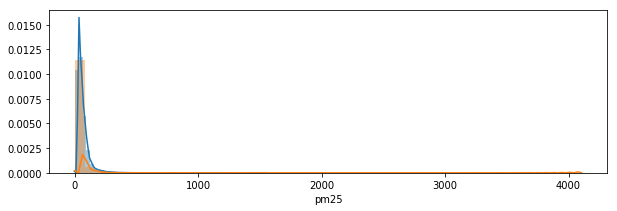

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
print('max pm10 :',nowon['pm10'].max())
print('max pm25 :',nowon['pm25'].max())
plt.figure(figsize=(10,3))
sns.distplot(nowon['pm10'].dropna(axis=0))
sns.distplot(nowon['pm25'].dropna(axis=0))

# 종로구

In [3]:
file_list = os.listdir('./환경기상데이터/종로구')
len(file_list)

31

In [14]:
jongro = pd.DataFrame()
for file in file_list :
    path = './환경기상데이터/종로구/'
    f1 = pd.read_csv(path + file)
    f1.drop(['Unnamed: 10'],axis=1,inplace=True)
    jongro = pd.concat([jongro, f1])
    
print('dataset shape :',jongro.shape)
jongro.head(2)

# V10O1611289 천연동 / V10O1611887 명동

dataset shape : (14610240, 10)


,tm,serial,flag,pm10,co2,vocs,noise,temp,humi,pm25
0,201804010000,V10O1611658,1,43,-9999,-9999,55,14.0,58,23.0
1,201804010001,V10O1611658,1,23,-9999,-9999,56,14.0,58,12.0


In [15]:
jongro = jongro.replace(-999,np.nan)
jongro = jongro.replace(-9999,np.nan)
jongro.isna().sum()

tm               0
serial           0
flag        571890
pm10        595672
co2       14610240
vocs      14610240
noise       580761
temp        655491
humi        655491
pm25        595672
dtype: int64

In [9]:
jongro.flag.value_counts()

1.0    14038350
Name: flag, dtype: int64

In [16]:
jongro.drop(['flag','co2','vocs'],axis=1,inplace=True)

# 동별로 median으로 대체

In [17]:
jongro = pd.merge(dong_df.drop(['dong','GU_CD'],axis=1),jongro,on='serial')

In [20]:
def make_date(tm):
    return(str(tm)[0:10])
jongro['HOUR_DT'] = jongro['tm'].apply(lambda x: make_date(x))

In [21]:
pm25_df = jongro.groupby(['DONG_CD','HOUR_DT'], as_index=False)['pm25'].median()
pm10_df = jongro.groupby(['DONG_CD','HOUR_DT'], as_index=False)['pm10'].median()
noise_df = jongro.groupby(['DONG_CD','HOUR_DT'], as_index=False)['noise'].median()
temp_df = jongro.groupby(['DONG_CD','HOUR_DT'], as_index=False)['temp'].median()
humi_df = jongro.groupby(['DONG_CD','HOUR_DT'], as_index=False)['humi'].median()

In [22]:
final_jongro = pd.merge(pm10_df,pm25_df,on=['DONG_CD','HOUR_DT'])
final_jongro = pd.merge(final_jongro,temp_df,on=['DONG_CD','HOUR_DT'])
final_jongro = pd.merge(final_jongro,humi_df,on=['DONG_CD','HOUR_DT'])
final_jongro = pd.merge(final_jongro,noise_df,on=['DONG_CD','HOUR_DT'])
final_jongro['GU_CD']=110
final_jongro.head(2)

,DONG_CD,HOUR_DT,pm10,pm25,temp,humi,noise,GU_CD
0,515,2018040100,49.5,23.0,11.6,67.0,49.0,110
1,515,2018040101,52.0,20.0,11.5,70.0,49.0,110


In [23]:
print('시간별 날씨 데이터 :', final_jongro.shape)
final_jongro.isnull().sum()

시간별 날씨 데이터 : (112824, 8)


DONG_CD       0
HOUR_DT       0
pm10        599
pm25        599
temp       1660
humi       1660
noise       496
GU_CD         0
dtype: int64

In [25]:
final_jongro.to_csv('jongrogu_median.csv',index=False,encoding='utf-8')

In [145]:
jongro = pd.read_csv('jongrogu_median.csv',encoding='utf-8')
print(jongro.shape)
jongro.isnull().sum()

(112824, 8)


DONG_CD       0
HOUR_DT       0
pm10        599
pm25        599
temp       1660
humi       1660
noise       496
GU_CD         0
dtype: int64

In [149]:
col = ['pm10', 'pm25', 'temp', 'humi', 'noise']

for i in range(5) :
    jongro[col[i]] = jongro.apply(lambda x: impute_na((i+2), x['DONG_CD'], x['HOUR_DT'],x[col[i]]), axis=1)
    
jongro.isnull().sum()

DONG_CD      0
HOUR_DT      0
pm10       118
pm25       118
temp       118
humi       122
noise      122
GU_CD        0
dtype: int64

In [151]:
col = ['pm10', 'pm25', 'temp', 'humi', 'noise']

for i in range(5) :
    jongro[col[i]] = jongro.apply(lambda x: impute_na2((i+2), x['HOUR_DT'],x[col[i]]), axis=1)
    
jongro.isnull().sum()

DONG_CD    0
HOUR_DT    0
pm10       0
pm25       0
temp       0
humi       0
noise      0
GU_CD      0
dtype: int64

In [153]:
jongro.to_csv('jongrogu_median_removena.csv',index=False,encoding='utf-8')

In [150]:
def impute_na2(i,time,var):
    if np.isnan(var) :
        return jongro[jongro['HOUR_DT'].isin([time])].mean()[i]
    else : return var     

In [137]:
def impute_na(i,dong,time,var):
    if np.isnan(var) :
        if dong == 600 :
            return jongro[(jongro['DONG_CD'].isin([650,615])) & (jongro['HOUR_DT'].isin([time]))].mean()[i]
        elif dong == 580 :
            return jongro[(jongro['DONG_CD'].isin([530])) & (jongro['HOUR_DT'].isin([time]))].mean()[i]
        elif dong==550 :
            return jongro[(jongro['DONG_CD'].isin([560,515])) & (jongro['HOUR_DT'].isin([time]))].mean()[i]
        elif dong==530 :
            return jongro[(jongro['DONG_CD'].isin([580,515,615])) & (jongro['HOUR_DT'].isin([time]))].mean()[i]
        elif dong==710 :
            return jongro[(jongro['DONG_CD'].isin([670])) & (jongro['HOUR_DT'].isin([time]))].mean()[i]
        elif dong==640 :
            return jongro[(jongro['DONG_CD'].isin([580,515,615])) & (jongro['HOUR_DT'].isin([time]))].mean()[i]
        elif dong==615 :
            return jongro[(jongro['DONG_CD'].isin([530,515,630,640])) & (jongro['HOUR_DT'].isin([time]))].mean()[i]
        elif dong==670 :
            return jongro[(jongro['DONG_CD'].isin([630,690,710])) & (jongro['HOUR_DT'].isin([time]))].mean()[i]
        elif dong==690 :
            return jongro[(jongro['DONG_CD'].isin([640,630,670])) & (jongro['HOUR_DT'].isin([time]))].mean()[i]
        elif dong==515 :
            return jongro[(jongro['DONG_CD'].isin([530,550])) & (jongro['HOUR_DT'].isin([time]))].mean()[i]
        elif dong==560 :
            return jongro[(jongro['DONG_CD'].isin([550])) & (jongro['HOUR_DT'].isin([time]))].mean()[i]
        elif dong==650 :
            return jongro[(jongro['DONG_CD'].isin([600,615,640])) & (jongro['HOUR_DT'].isin([time]))].mean()[i]
    else : return var